In [1]:
import math
import time
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np

In [2]:
@dataclass
class Gen:
    best_fitness: int
    avg_fitness: float

    def __init__(self, best, avg):
        self.best_fitness = best
        self.avg_fitness = avg

In [3]:
class Evolution():
    def __init__(self, max = 256, size=10, base = 8):
        self.size = size
        self.base = base
        self.max = max
        self.generations = []
        self.start_gen = np.random.randint(0, max, size=size)
        self.generations.append(self.start_gen)
        self.target = np.random.randint(0, max)

    def mutation(self, x: int):
        start = np.random.randint(0, math.floor(self.base/2))
        end = np.random.randint(start, math.floor(self.base))
        x_str = str(bin(x))[2:]

        if len(x_str) != self.base:
            for i in range(self.base-len(x_str)):
                x_str = '0' + x_str

        x_str = list(x_str)
        for i in range(start, end):
            x_str[i] = '1' if x_str[i] == '0' else '0'

        return int(''.join(x_str), 2)

    def combine(self, x, y):
        rnd = np.random.randint(0, 2)
        x_str = str(bin(x if rnd == 0 else y))[2:]
        y_str = str(bin(x if rnd == 1 else y))[2:]
        n = 0
        if len(x_str) % 2 == 0:
            n = len(x_str) / 2
        else:
            if self.fitness(x if rnd == 0 else y) > self.fitness(x if rnd == 1 else y):
                n = math.ceil(len(x_str) / 2)
            else:
                n = math.floor(len(x_str) / 2)

        n = int(n)
        child = x_str[:n]+y_str[n:]
        return int(child, 2)

    def fitness(self, x: int):
        return -np.abs(x - self.target)

    def get_new_combination(self, gen: zip):
        new_gen = []
        t = 0
        best = 0
        second = 0

        for i in range(len(gen)):
            if best > gen[i][0] > second != gen[i][1]:
                second = gen[i][1]

            if gen[i][0] > best != gen[i][1]:
                second = best
                best = gen[i][1]

        for i in gen:
            new_gen.append(self.combine(i[1], best))
            new_gen.append(self.combine(i[1], second))

        return new_gen

    def get_new_gen(self, old_gen):
        new_gen = self.get_new_combination(old_gen)

        for i in np.random.randint(0, self.size, size=math.floor(self.size/2)):
            new_gen[i] = self.mutation(new_gen[i])

        return new_gen

    def train(self):
        i = 0
        fs = []
        while True:

            fitnesses = [self.fitness(x) for x in self.generations[i]]
            fs.append(fitnesses)
            # Pick 5 best numbers
            gen = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
            if max(fitnesses) == 0:
                print(self.generations)
                return [Gen(max(f), sum(f)/len(f)) for f in fs], self.generations

            new_gen = self.get_new_gen(gen)
            #print(new_gen)
            #print(self.target)
            self.generations.append(new_gen)

            i += 1

    def train_time(self):
        i = 0
        sts = []

        for t in range(20):
            print(i)
            st = time.time()
            while True:

                fitnesses = [self.fitness(x) for x in self.generations[i]]
                # Pick 5 best numbers
                gen = sorted(zip(fitnesses, self.generations[i]), reverse=True)[:(math.floor(self.size/2))]
                if max(fitnesses) == 0:
                    et = time.time()
                    sts.append(et-st)
                    break
                #print(gen)
                new_gen = self.get_new_gen(gen)
                self.generations.append(new_gen)

                i += 1

        return sum(sts)/len(sts)

In [8]:
def print_gens(gen, best, avg, i):
    print(f"Gen {i}: ")
    print(gen)
    print(f"Best Fitness: {best}")
    print(f"Avg Fitness: {avg}")
    print("")

In [9]:
def task1():
    evo = Evolution()

    gen, gens = evo.train()

    for i in range(len(gens)):
        print_gens(gens[i], gen[i].best_fitness, gen[i].avg_fitness, i)

    print(f"Target: {evo.target}")

In [10]:
def task2():
    n = np.arange(8, 18)
    time  = []

    for i in range(8, 18):
        evo = Evolution(2**i, 20, i)
        time.append(evo.train_time())
        print(f"Done with: {2**i}")
        print(f"Target: {evo.target}")
    plt.xlabel("Bit length")
    plt.ylabel("Time (s)")
    plt.plot(n, time)
    plt.show()

In [11]:
task1()

[array([ 22,  61,  46, 104, 198, 239, 243,   7,  65, 210]), [13, 13, 8, 246, 61, 7, 12, 40, 46, 46], [61, 127, 5, 94, 54, 46, 40, 40, 3, 37], [3, 63, 94, 11, 7, 61, 54, 6, 46, 74], [94, 43, 55, 9, 7, 47, 69, 5, 54, 6], [94, 94, 112, 8, 55, 6, 96, 30, 47, 5], [112, 126, 16, 12, 94, 11, 66, 11, 26, 230], [126, 102, 14, 14, 11, 38, 66, 8, 6, 26], [191, 126, 12, 102, 66, 178, 4, 38, 6, 26], [15, 126, 154, 38, 162, 178, 66, 244, 11, 191], [15, 15, 53, 100, 162, 178, 11, 178, 66, 122], [122, 31, 100, 100, 210, 162, 178, 178, 51, 123], [15, 135, 122, 118, 16, 12, 100, 114, 10, 162], [2, 15, 254, 118, 16, 8, 14, 114, 12, 12], [14, 118, 114, 138, 4, 16, 143, 15, 51, 14], [14, 62, 98, 114, 8, 146, 143, 8, 51, 45], [114, 14, 56, 191, 9, 49, 98, 98, 62, 38], [14, 116, 98, 12, 98, 98, 46, 7, 199, 191], [142, 14, 98, 140, 28, 12, 98, 20, 11, 23], [8, 24, 14, 142, 94, 16, 12, 240, 7, 7], [240, 8, 11, 27, 6, 24, 232, 196, 253, 14], [248, 196, 27, 6, 134, 30, 14, 14, 3, 3], [190, 8, 196, 196, 226, 187,

0
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
Done with: 256
Target: 125
0
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
Done with: 512
Target: 190
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
Done with: 1024
Target: 48
0
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
Done with: 2048
Target: 267
0
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
Done with: 4096
Target: 213
0
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
1091
Done with: 8192
Target: 6094
0
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
3002
Done with: 16384
Target: 10468
0
607
607
607
607
607
607
607
607
607
607
607
607
607
607
607
607
607
607
607
Done with: 32768
Target: 4580
0
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
20179
Done with: 65536
Target: 40648
0
16695
16695
16695
16695
16695
16695
16

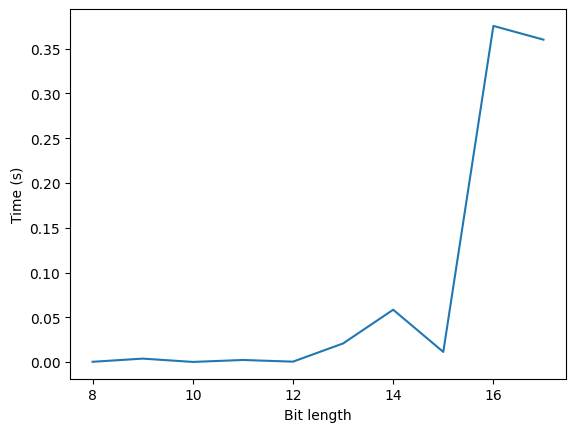

In [12]:
task2()